In [ ]:
# This script calculates the sharpness of oscillations

**Imports**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
import pac
import shap_R as til
from scipy.signal import firwin

**Load data**

In [3]:
lfp = til.loadPD()
Fs, t, S, Sdy, flo, fhi = til.loadmeta()
print(range(S))

range(0, 12)


In [4]:

t = np.arange(0, 30, 1 / Fs) 
print(lfp)
print(flo)

{'B': array([ array([ 1.56049839,  1.70142524,  1.00995476, ..., -0.99875054,
       -1.24763572, -1.19962837]),
       array([ 0.65666847,  0.97155252,  1.00778371, ..., -0.30754458,
       -0.13441079,  0.1685336 ]),
       array([ 1.28199618,  0.68706766, -0.14212903, ...,  0.38688298,
        0.36695663, -0.40831288]),
       array([-1.00240464, -0.69003304, -0.11677742, ...,  1.04137976,
        1.33857946,  1.18306004]),
       array([-0.06543788, -0.45811288, -0.60443621, ...,  0.30188342,
       -0.00830553, -0.06538695]),
       array([ 0.52828493,  0.16225165,  0.38696042, ...,  1.20161669,
        0.39008619,  0.03137578]),
       array([ 1.17763854,  0.58391109, -0.22540422, ...,  5.81959181,
        6.30102274,  5.97087529]),
       array([ 0.6747219 ,  0.63775615,  0.46338317, ...,  0.95487805,
        0.89779233,  0.53041249]),
       array([-0.01914945,  0.12559225,  0.23149678, ...,  0.11485102,
        0.76755979,  0.79654702]),
       array([-0.42984354, -0.81709249,

 **Compute features of waveform shape**

In [5]:
import shape
pks, trs = shape.findpt(
            lfp['B'][5], (13,30), Fs=1000, boundary=100)
print(pks)

[  101   152   205   270   294   331   378   409   471   549   607   681
   713   739   771   814   865   926   978  1026  1098  1131  1187  1251
  1279  1357  1391  1453  1503  1543  1588  1641  1673  1708  1777  1813
  1862  1901  1967  2016  2062  2110  2159  2200  2265  2327  2367  2422
  2470  2534  2596  2671  2696  2747  2794  2857  2894  2931  2998  3047
  3094  3162  3200  3229  3289  3374  3424  3489  3535  3577  3648  3694
  3785  3824  3859  3900  3956  4003  4030  4056  4117  4149  4193  4231
  4268  4309  4345  4392  4444  4493  4533  4568  4648  4668  4727  4749
  4826  4862  4881  4931  4979  5007  5089  5138  5174  5213  5246  5280
  5333  5361  5406  5514  5595  5623  5671  5718  5793  5846  5900  5946
  5996  6033  6095  6157  6206  6258  6322  6359  6433  6476  6531  6561
  6604  6671  6720  6765  6796  6835  6866  6903  6932  6986  7016  7051
  7105  7156  7193  7233  7309  7349  7403  7440  7490  7535  7566  7647
  7695  7720  7771  7808  7877  7942  7986  8024  8

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


In [6]:


widthS = 5 # hyperparameter for calculating sharpness

pks, trs, pksharp, trsharp, esrs, \
peaktotrough, risteep, desteep, rdsrs, \
risetodecay = til.measure_shape(lfp, widthS=widthS)

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


# A
### Locating oscillatory extrema

In [9]:
# Select one recording
group ='B'
subj=2
x = lfp[group][subj]

# Bandpass filter in be ta frequency range
w = 3
xbeta = til.firf(x, flo, Fs, w = w, rmvedge=False)

# Determine rising and falling zerocrossings.
pos = xbeta > 0
zerorises = (pos[:-1] & ~pos[1:]).nonzero()[0]
pos = xbeta < 0
zerofalls = (pos[:-1] & ~pos[1:]).nonzero()[0]

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


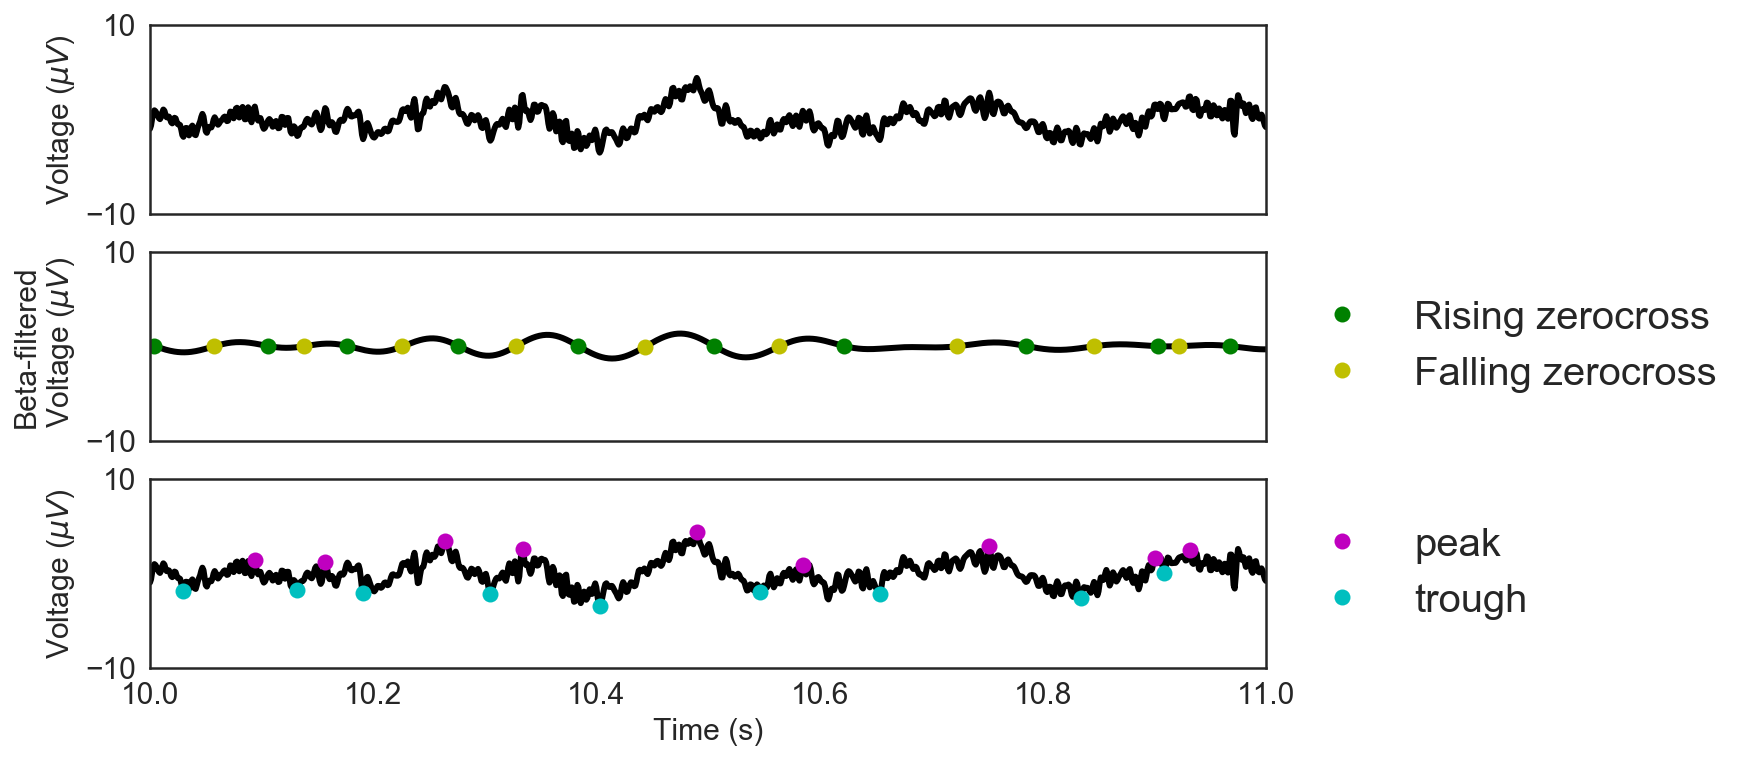

In [10]:
xlim = (10,11)
xlim2 = (4.83,4.88)
ylim = (-10,10)
pkidx = 104
tridx = 103

fig = plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
plt.plot(t, x,'k',linewidth=3)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

plt.subplot(4,1,2)
plt.plot(t, xbeta, 'k',linewidth=3)
plt.plot(t[zerorises], xbeta[zerorises], 'go', ms=8,label='Rising zerocross')
plt.plot(t[zerofalls], xbeta[zerofalls], 'yo', ms=8,label='Falling zerocross')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Beta-filtered\n Voltage ($\mu V$)',size=15)
plt.xlim(xlim)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

plt.subplot(4,1,3)
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim)
plt.xlabel('Time (s)',size=15)
plt.tick_params(labelsize=15)

# B
### Estimating extrema sharpness

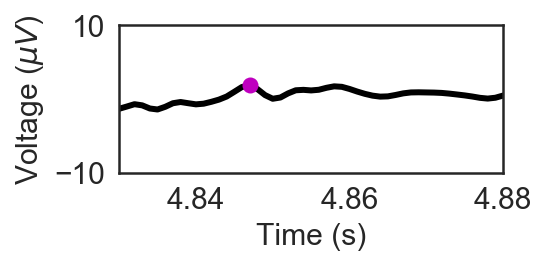

In [11]:
plt.figure(figsize=(4,2))
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.plot([t[pks[group][subj][pkidx]]-widthS/Fs,t[pks[group][subj][pkidx]]-widthS/Fs],[-1000,1000],'m-')
plt.plot([t[pks[group][subj][pkidx]]+widthS/Fs,t[pks[group][subj][pkidx]]+widthS/Fs],[-1000,1000],'m-')
plt.plot([t[trs[group][subj][tridx]]-widthS/Fs,t[trs[group][subj][tridx]]-widthS/Fs],[-1000,1000],'c-')
plt.plot([t[trs[group][subj][tridx]]+widthS/Fs,t[trs[group][subj][tridx]]+widthS/Fs],[-1000,1000],'c-')
plt.plot(t[pks[group][subj][pkidx]-widthS],x[pks[group][subj][pkidx]-widthS],'m^',ms=10)
plt.plot(t[pks[group][subj][pkidx]+widthS],x[pks[group][subj][pkidx]+widthS],'m^',ms=10)
plt.plot(t[trs[group][subj][tridx]-widthS],x[trs[group][subj][tridx]-widthS],'c^',ms=10)
plt.plot(t[trs[group][subj][tridx]+widthS],x[trs[group][subj][tridx]+widthS],'c^',ms=10)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim2)
plt.tick_params(labelsize=15)
plt.xlabel('Time (s)',size=15)

plt.tight_layout()

In [12]:
print(round(x[pks[group][subj][pkidx]]))
print(round(x[pks[group][subj][pkidx]-widthS]))
print(round(x[pks[group][subj][pkidx]+widthS]))
print(round(pksharp[group][subj][pkidx]))

print(round(x[trs[group][subj][tridx]]))
print(round(x[trs[group][subj][tridx]-widthS]))
print(round(x[trs[group][subj][tridx]+widthS]))
print(round(trsharp[group][subj][tridx]))

2.0
2.0
1.0
0.0
-2.0
1.0
-1.0
1.0


In [13]:
import imp
imp.reload(til)

<module 'shap_R' from '/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/shap_R.py'>

# C
### Sharpness in 1 subject before DBS

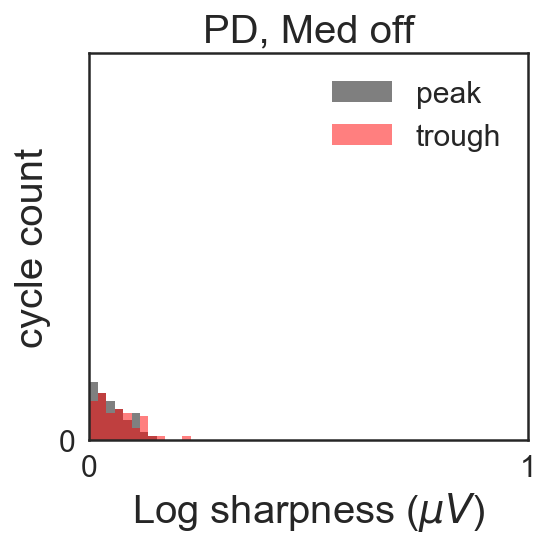

In [14]:
s = 7

Nbins = 20
bins=np.linspace(0,np.max(np.hstack((np.log10(risteep['B'][s]),np.log10(trsharp['B'][s])))),Nbins)

plt.figure(figsize=(4,4))
plt.hist(np.log10(risteep['B'][s]),bins,color='k',alpha=0.5,label='peak')
plt.hist(np.log10(desteep['B'][s]),bins,color='r',alpha=0.5,label='trough')
plt.title('PD, Med off',size=20)
plt.ylabel('cycle count',size=20)
plt.xlabel('Log sharpness ($\mu V$)',size=20)
plt.yticks([0,200],size=15)
plt.xticks([0,1,2,3],size=15)
plt.xlim((0,1))
plt.legend(loc='best',fontsize=15)
plt.ylim((0,100))
plt.tight_layout()

# D
### Sharpness in 1 subject during DBS

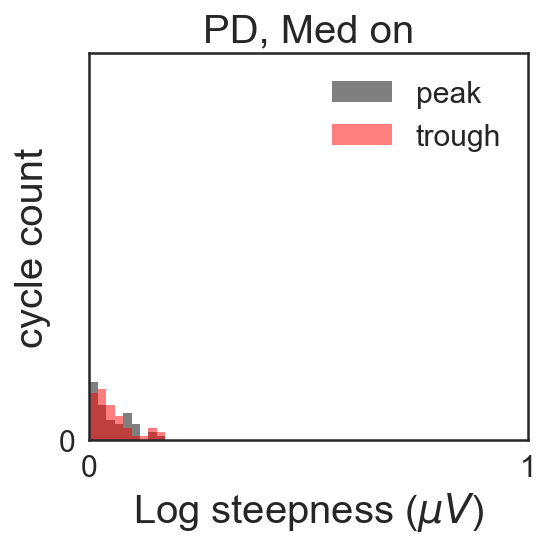

In [15]:
plt.figure(figsize=(4,4))
plt.hist(np.log10(risteep['D'][s]),bins,color='k',alpha=0.5,label='peak')
plt.hist(np.log10(desteep['D'][s]),bins,color='r',alpha=0.5,label='trough')
plt.ylabel('cycle count',size=20)
plt.title('PD, Med on',size=20)
plt.xlabel('Log steepness ($\mu V$)',size=20)
plt.yticks([0,200],size=15)
plt.xticks([0,1,2,3],size=15)
plt.xlim((0,1))
plt.legend(loc='best',fontsize=15)
plt.ylim((0,100))
plt.tight_layout()

# E
### Sharpness ratio change with DBS

Ttest_relResult(statistic=0.151636674218804, pvalue=0.88221880097323957)


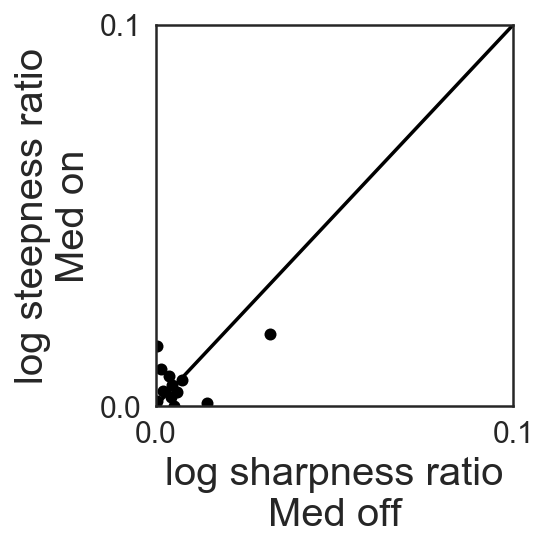

In [16]:
from plt import scatt_2cond
scatt_2cond(rdsrs['B'],rdsrs['D'],ms=12,
           lims = (0,.1), xlabel = 'log sharpness ratio\nMed off',
            ylabel = 'log steepness ratio\nMed on',figsize=(4,4))
print(sp.stats.ttest_rel(rdsrs['B'],rdsrs['D']))

import scipy.io as sio
#sio.savemat('/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/Files/sharpness.mat', {'esrs':esrs})
#plt.savefig('/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/Files/Results/leftSTN_sharpnessRatio.png')